# 필요한 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as spst
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # matplotlib style 설정

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\박수빈\AppData\Local\Temp\ipykernel_6500\1734918822.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # matplotlib style 설정


# 데이터 파일 불러오기

In [2]:
customer = pd.read_csv("./data file/olist_customers.csv")
order = pd.read_csv("./data file/olist_orders.csv")
item = pd.read_csv("./data file/olist_order_items.csv")
payment = pd.read_csv("./data file/olist_order_payments.csv")
product = pd.read_csv("./data file/olist_products.csv")
category = pd.read_csv("./data file/product_category_name_translation.csv")

In [3]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   product_id     112650 non-null  object 
 2   seller_id      112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.3+ MB


# 필요한 데이터끼리 병합

customer --(customer_id)-- order --(order_id)-- order_item --(order_id)-- payment  

order_item --(product_id)-- product --(product_category_name)-- category_name_translation

In [4]:
customer_order = pd.merge(customer, order, on='customer_id', how='left')
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00


In [5]:
customer_order['customer_unique_id'].value_counts()

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

## 고객 별 누적 구매 횟수 열 'total_visits' 추가

In [6]:
customer_order['total_visits'] = customer_order.groupby('customer_unique_id')['customer_unique_id'].transform('count')
customer_order

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1


In [7]:
customer_order.groupby('total_visits')['total_visits'].count()

total_visits
1     93099
2      5490
3       609
4       120
5        40
6        36
7        21
9         9
17       17
Name: total_visits, dtype: int64

In [8]:
customer_order_item = pd.merge(customer_order, item, on="order_id", how='left')
customer_order_item

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,product_id,seller_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07


## 고객 별 누적 구매 물품 수 'total_items' 추가

In [10]:
customer_order_item['total_items'] = customer_order_item.groupby('customer_unique_id')['customer_unique_id'].transform('count')
customer_order_item

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,product_id,seller_id,price,freight_value,total_items
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,1
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,1
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,1
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,1


In [16]:
customer_order_item.groupby('customer_unique_id')['customer_unique_id'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 96096, dtype: int64

In [12]:
customer_order_item_payment = pd.merge(customer_order_item, payment, on="order_id", how="left")
customer_order_item_payment

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,product_id,seller_id,price,freight_value,total_items,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,1,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,1,1.0,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,1,1.0,credit_card,6.0,88.78
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,1,1.0,credit_card,3.0,129.06
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,1,1.0,credit_card,5.0,56.04
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,1,1.0,credit_card,2.0,711.07


In [22]:
customer_order_item_payment.groupby('customer_unique_id')['customer_unique_id'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 96096, dtype: int64

In [23]:
customer_order_item_payment_product = pd.merge(customer_order_item_payment, product, on="product_id", how="left")
customer_order_item_payment_product

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,total_items,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,1,1.0,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,1,1.0,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,1,1.0,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,1,1.0,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,1,1.0,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,1,1.0,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,1,1.0,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,1,1.0,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,1,1.0,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0


In [25]:
customer_order_item_payment_product.groupby('customer_unique_id')['customer_unique_id'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 96096, dtype: int64

In [26]:
df = pd.merge(customer_order_item_payment_product, category, on="product_category_name", how="left")
df

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,1.0,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,1.0,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,1.0,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,1.0,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,1.0,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,1.0,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0,books_general_interest
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,1.0,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0,sports_leisure
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,1.0,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0,health_beauty
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,1.0,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0,watches_gifts


In [28]:
df.groupby('customer_unique_id')['customer_unique_id'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 96096, dtype: int64

# 'total_visits'가 1인 고객 제거

In [34]:
df_1 = df.copy()
df_1

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,00e7ee1b050b8499577073aeb2a297a1,delivered,2022-05-16 15:05:35,2022-05-16 15:22:12,2022-05-25 10:35:35,2022-06-05 00:00:00,1,...,1.0,credit_card,2.0,146.87,moveis_escritorio,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,29150127e6685892b6eab3eec79f59c7,delivered,2023-01-12 20:48:24,2023-01-12 20:58:32,2023-01-29 12:41:19,2023-02-06 00:00:00,1,...,1.0,credit_card,8.0,335.48,utilidades_domesticas,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2023-05-19 16:07:45,2023-05-20 16:19:10,2023-06-14 17:58:51,2023-06-13 00:00:00,1,...,1.0,credit_card,7.0,157.73,moveis_escritorio,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,951670f92359f4fe4a63112aa7306eba,delivered,2023-03-13 16:06:38,2023-03-13 17:29:19,2023-03-28 16:04:25,2023-04-10 00:00:00,1,...,1.0,credit_card,1.0,173.30,moveis_escritorio,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2023-07-29 09:51:30,2023-07-29 10:10:09,2023-08-09 20:55:48,2023-08-15 00:00:00,1,...,1.0,credit_card,8.0,252.25,casa_conforto,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,6760e20addcf0121e9d58f2f1ff14298,delivered,2023-04-07 15:48:17,2023-04-07 16:08:45,2023-04-13 20:06:37,2023-04-25 00:00:00,1,...,1.0,credit_card,6.0,88.78,livros_interesse_geral,611.0,22.0,22.0,23.0,books_general_interest
118430,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2023-04-04 08:20:22,2023-04-04 08:35:12,2023-04-11 18:54:45,2023-04-20 00:00:00,1,...,1.0,credit_card,3.0,129.06,esporte_lazer,1211.0,25.0,24.0,22.0,sports_leisure
118431,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fed4434add09a6f332ea398efd656a5c,delivered,2023-04-08 20:11:50,2023-04-08 20:30:03,2023-05-09 19:03:15,2023-05-02 00:00:00,1,...,1.0,credit_card,5.0,56.04,beleza_saude,870.0,25.0,20.0,18.0,health_beauty
118432,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,e31ec91cea1ecf97797787471f98a8c2,delivered,2022-11-03 21:08:33,2022-11-03 21:31:20,2022-11-16 19:58:39,2022-12-05 00:00:00,1,...,1.0,credit_card,2.0,711.07,relogios_presentes,710.0,19.0,13.0,14.0,watches_gifts


In [35]:
df_1 = df_1[df_1['total_visits']>1]
df_1.groupby('total_visits')['total_visits'].count()

total_visits
2     6998
3      824
4      172
5       46
6       47
7       31
9       14
17      17
Name: total_visits, dtype: int64

# total_visits가 2회인 고객과 3회 이상인 고객 나누기

In [153]:
df_2 = df_1[df_1['total_visits']==2]
df_2.groupby('total_visits')['total_visits'].count()

total_visits
2    6998
Name: total_visits, dtype: int64

In [37]:
df_3 = df_1[df_1['total_visits']>2]
df_3.groupby('total_visits')['total_visits'].count()

total_visits
3     824
4     172
5      46
6      47
7      31
9      14
17     17
Name: total_visits, dtype: int64

# 재방문 시기

In [40]:
df_2.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'total_visits', 'product_id',
       'seller_id', 'price', 'freight_value', 'total_items',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [51]:
df_2['order_purchase_timestamp'] = pd.to_datetime(df_2['order_purchase_timestamp'])
df_2['order_purchase_timestamp'] 

5        2022-09-14 18:14:31
8        2023-01-18 12:35:44
13       2023-03-07 15:57:14
35       2023-04-18 09:42:53
36       2022-06-14 18:31:54
                 ...        
118300   2023-06-20 14:16:20
118301   2023-06-20 14:16:20
118302   2023-06-20 14:16:20
118322   2023-05-15 10:39:41
118387   2023-01-24 17:53:44
Name: order_purchase_timestamp, Length: 6998, dtype: datetime64[ns]

In [52]:
first_visit = pd.DataFrame(df_2.groupby('customer_unique_id')['order_purchase_timestamp'].min())
first_visit

,order_purchase_timestamp
customer_unique_id,
00172711b30d52eea8b313a7f2cced02,2023-07-28 00:23:49
004288347e5e88a27ded2bb23747066c,2022-07-27 14:13:03
004b45ec5c64187465168251cd1c9c2f,2022-09-01 12:11:23
0058f300f57d7b93c477a131a59b36c3,2023-02-19 17:11:34
00a39521eb40f7012db50455bf083460,2023-05-23 20:14:21
...,...
ff03923ad1eb9e32304deb7f9b2a45c9,2023-04-23 21:49:49
ff22e30958c13ffe219db7d711e8f564,2023-08-24 17:02:19
ff44401d0d8f5b9c54a47374eb48c1b8,2022-05-19 21:20:54


In [53]:
second_visit = pd.DataFrame(df_2.groupby('customer_unique_id')['order_purchase_timestamp'].max())
second_visit

,order_purchase_timestamp
customer_unique_id,
00172711b30d52eea8b313a7f2cced02,2023-08-13 09:14:07
004288347e5e88a27ded2bb23747066c,2023-01-14 07:36:54
004b45ec5c64187465168251cd1c9c2f,2023-05-26 19:42:48
0058f300f57d7b93c477a131a59b36c3,2023-03-22 18:09:41
00a39521eb40f7012db50455bf083460,2023-06-03 10:12:57
...,...
ff03923ad1eb9e32304deb7f9b2a45c9,2023-05-26 11:51:22
ff22e30958c13ffe219db7d711e8f564,2023-09-03 09:06:57
ff44401d0d8f5b9c54a47374eb48c1b8,2022-05-19 21:20:54


([<matplotlib.axis.XTick at 0x239f8231bd0>,
 [Text(18293.0, 0, '2020-02-01'),
  Text(18353.0, 0, '2020-04-01'),
  Text(18413.0, 0, '2020-05-31'),
  Text(18473.0, 0, '2020-07-30'),
  Text(18533.0, 0, '2020-09-28'),
  Text(18593.0, 0, '2020-11-27'),
  Text(18653.0, 0, '2021-01-26'),
  Text(18713.0, 0, '2021-03-27'),
  Text(18773.0, 0, '2021-05-26'),
  Text(18833.0, 0, '2021-07-25'),
  Text(18893.0, 0, '2021-09-23'),
  Text(18953.0, 0, '2021-11-22'),
  Text(19013.0, 0, '2022-01-21'),
  Text(19073.0, 0, '2022-03-22'),
  Text(19133.0, 0, '2022-05-21'),
  Text(19193.0, 0, '2022-07-20'),
  Text(19253.0, 0, '2022-09-18'),
  Text(19313.0, 0, '2022-11-17'),
  Text(19373.0, 0, '2023-01-16'),
  Text(19433.0, 0, '2023-03-17'),
  Text(19493.0, 0, '2023-05-16'),
  Text(19553.0, 0, '2023-07-15'),
  Text(19613.0, 0, '2023-09-13'),
  Text(19673.0, 0, '2023-11-12'),
  Text(19733.0, 0, '2024-01-11')])

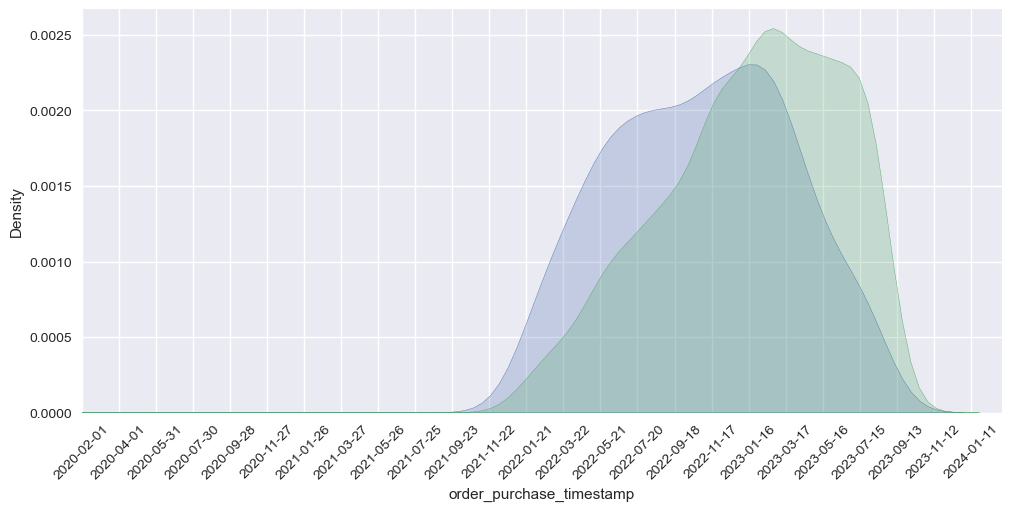

In [115]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.kdeplot(x='order_purchase_timestamp', data=first_visit,fill=True, ax=ax)
sns.kdeplot(x='order_purchase_timestamp', data=second_visit,fill=True, ax=ax)
plt.xlim(pd.Timestamp('2020-02-01'), pd.Timestamp('2024-03-01'))

# 눈금 위치 생성: '2020-02-01'부터 '2024-03-01'까지 매 30일마다 눈금을 생성
ticks = pd.date_range(start='2020-02-01', end='2024-03-01', freq='60D')

# plt.xticks()에 눈금 위치와 눈금 라벨 설정
plt.xticks(ticks, ticks.strftime('%Y-%m-%d'), rotation=45)

In [60]:
# 고객별 최소 주문 시간
min_timestamps = df_2.groupby('customer_unique_id')['order_purchase_timestamp'].min().rename('first_purchase')

# 고객별 최대 주문 시간
max_timestamps = df_2.groupby('customer_unique_id')['order_purchase_timestamp'].max().rename('last_purchase')

# 두 Series를 하나의 DataFrame으로 병합
df_duration = pd.concat([min_timestamps, max_timestamps], axis=1)

# 재방문까지 걸린 시간 계산 (예: 일 단위로 계산)
df_duration['duration'] = df_duration['last_purchase'] - df_duration['first_purchase']

# 결과 확인
df_duration

,first_purchase,last_purchase,duration
customer_unique_id,,,
00172711b30d52eea8b313a7f2cced02,2023-07-28 00:23:49,2023-08-13 09:14:07,16 days 08:50:18
004288347e5e88a27ded2bb23747066c,2022-07-27 14:13:03,2023-01-14 07:36:54,170 days 17:23:51
004b45ec5c64187465168251cd1c9c2f,2022-09-01 12:11:23,2023-05-26 19:42:48,267 days 07:31:25
0058f300f57d7b93c477a131a59b36c3,2023-02-19 17:11:34,2023-03-22 18:09:41,31 days 00:58:07
00a39521eb40f7012db50455bf083460,2023-05-23 20:14:21,2023-06-03 10:12:57,10 days 13:58:36
...,...,...,...
ff03923ad1eb9e32304deb7f9b2a45c9,2023-04-23 21:49:49,2023-05-26 11:51:22,32 days 14:01:33
ff22e30958c13ffe219db7d711e8f564,2023-08-24 17:02:19,2023-09-03 09:06:57,9 days 16:04:38
ff44401d0d8f5b9c54a47374eb48c1b8,2022-05-19 21:20:54,2022-05-19 21:20:54,0 days 00:00:00


In [64]:
df_duration['duration'].describe()

count                           2745
mean      87 days 04:48:21.765391621
std      164 days 17:01:22.351277096
min                  0 days 00:00:00
25%                  0 days 00:02:01
50%                 28 days 01:12:31
75%                125 days 22:39:41
max               2434 days 23:29:38
Name: duration, dtype: object

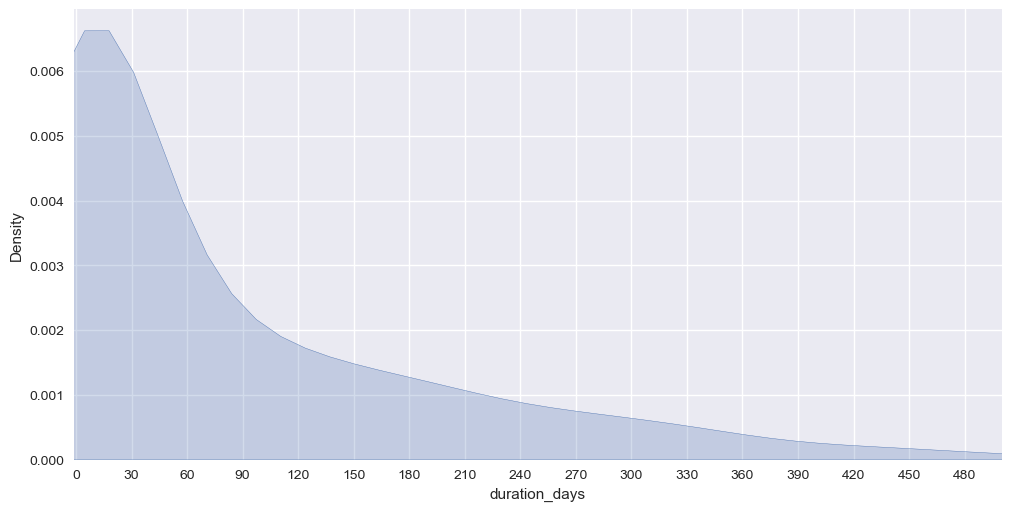

In [85]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
# duration을 일 단위로 변환
df_duration['duration_days'] = df_duration['duration'].dt.days

# KDE 플롯 그리기
sns.kdeplot(data=df_duration, x='duration_days', fill=True)

plt.xlim(-1,500)
plt.xticks(range(0, 500, 30))
plt.show()

# 구매품목

In [154]:
df_2

,customer_id,customer_unique_id,customer_zip_code_prefix,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,total_visits,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2022-09-14 18:14:31,2022-09-14 18:25:11,2022-09-28 17:32:43,2022-10-04 00:00:00,2,...,1.0,debit_card,1.0,282.21,esporte_lazer,4450.0,60.0,15.0,15.0,sports_leisure
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,1ebeea841c590e86a14a0d7a48e7d062,delivered,2023-01-18 12:35:44,2023-01-18 12:56:32,2023-01-26 15:17:57,2023-02-20 00:00:00,2,...,1.0,debit_card,1.0,39.10,brinquedos,350.0,28.0,10.0,12.0,toys
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2023-03-07 15:57:14,2023-03-07 16:15:30,2023-03-15 00:46:30,2023-03-19 00:00:00,2,...,1.0,credit_card,3.0,36.39,telefonia,300.0,17.0,4.0,12.0,telephony
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,19c0c76962278b152cc44fc63ffd5e48,delivered,2023-04-18 09:42:53,2023-04-18 09:55:17,2023-05-17 20:19:49,2023-05-18 00:00:00,2,...,1.0,credit_card,1.0,67.05,moveis_decoracao,500.0,16.0,5.0,20.0,furniture_decor
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,77b062be7c5bd21712905feb8e1cfeed,delivered,2022-06-14 18:31:54,2022-06-15 18:43:04,2022-07-07 20:32:47,2022-07-07 00:00:00,2,...,1.0,credit_card,8.0,134.25,cama_mesa_banho,1050.0,16.0,10.0,16.0,bed_bath_table
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118300,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118301,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118302,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,181ff95f97fee531c4afa9e882186f18,delivered,2023-06-20 14:16:20,2023-06-20 14:38:41,2023-06-27 13:18:47,2023-07-18 00:00:00,2,...,1.0,credit_card,1.0,126.57,utilidades_domesticas,445.0,23.0,12.0,14.0,housewares
118322,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,0e48ca107de4291a6f7536b4f5cf512e,delivered,2023-05-15 10:39:41,2023-05-15 14:30:29,2023-05-22 19:42:12,2023-06-12 00:00:00,2,...,1.0,debit_card,1.0,80.37,moveis_decoracao,800.0,69.0,11.0,11.0,furniture_decor


In [155]:
df_2['product_category_name_english'].value_counts()

product_category_name_english
bed_bath_table                           1027
furniture_decor                           788
sports_leisure                            620
health_beauty                             514
computers_accessories                     488
                                         ... 
tablets_printing_image                      2
fashion_sport                               1
small_appliances_home_oven_and_coffee       1
la_cuisine                                  1
fashion_childrens_clothes                   1
Name: count, Length: 67, dtype: int64

In [156]:
df_2['product_category_name_english'].describe()

count               6814
unique                67
top       bed_bath_table
freq                1027
Name: product_category_name_english, dtype: object

In [157]:
df_2_cat = pd.DataFrame(df_2['product_category_name_english'].value_counts()).reset_index()
df_2_cat.columns=['product_category_name_english','count']
df_2_cat.head(30)

,product_category_name_english,count
0,bed_bath_table,1027
1,furniture_decor,788
2,sports_leisure,620
3,health_beauty,514
4,computers_accessories,488
5,housewares,423
6,garden_tools,277
7,watches_gifts,271
8,fashion_bags_accessories,212
9,telephony,196


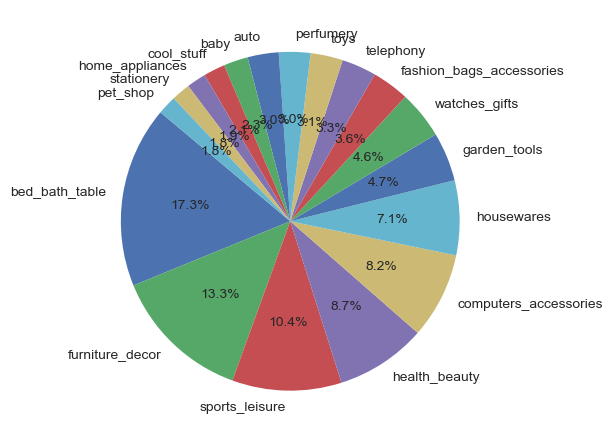

In [158]:
df_2_cat_top100 = df_2_cat[df_2_cat['count']>100]
plt.pie(df_2_cat_top100['count'], labels=df_2_cat_top100['product_category_name_english'], 
        autopct='%1.1f%%', startangle=140)
plt.show()

In [170]:
df_2_cat_diff = pd.DataFrame(df_2.groupby('customer_unique_id')['product_category_name_english'].unique())
df_2_cat_diff

,product_category_name_english
customer_unique_id,
00172711b30d52eea8b313a7f2cced02,"[stationery, nan]"
004288347e5e88a27ded2bb23747066c,"[cool_stuff, luggage_accessories]"
004b45ec5c64187465168251cd1c9c2f,"[garden_tools, furniture_decor]"
0058f300f57d7b93c477a131a59b36c3,"[luggage_accessories, stationery]"
00a39521eb40f7012db50455bf083460,"[sports_leisure, electronics]"
...,...
ff03923ad1eb9e32304deb7f9b2a45c9,[health_beauty]
ff22e30958c13ffe219db7d711e8f564,[kitchen_dining_laundry_garden_furniture]
ff44401d0d8f5b9c54a47374eb48c1b8,[fashion_bags_accessories]


In [173]:
df_2_cat_diff_single = df_2_cat_diff[df_2_cat_diff['product_category_name_english'].apply(len) == 1]
df_2_cat_diff_single

,product_category_name_english
customer_unique_id,
012a218df8995d3ec3bb221828360c86,[auto]
013f4353d26bb05dc6652f1269458d8d,[sports_leisure]
0178b244a5c281fb2ade54038dd4b161,[bed_bath_table]
01886ef98f995e4f2dd75a1d04c97397,[health_beauty]
018b5a7502c30eb5f230f1b4eb23a156,[fashion_bags_accessories]
...,...
fe52c2abb172426dd6416cc69e6b3689,[bed_bath_table]
ff03923ad1eb9e32304deb7f9b2a45c9,[health_beauty]
ff22e30958c13ffe219db7d711e8f564,[kitchen_dining_laundry_garden_furniture]


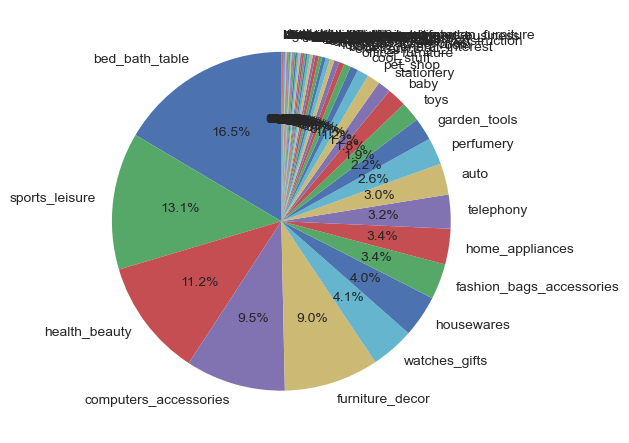

In [176]:
df_2_cat_diff_single['product_category_name'] = df_2_cat_diff_single['product_category_name_english'].apply(lambda x: x[0])
category_counts = df_2_cat_diff_single['product_category_name'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()


<Axes: xlabel='product_category_name_english', ylabel='count'>

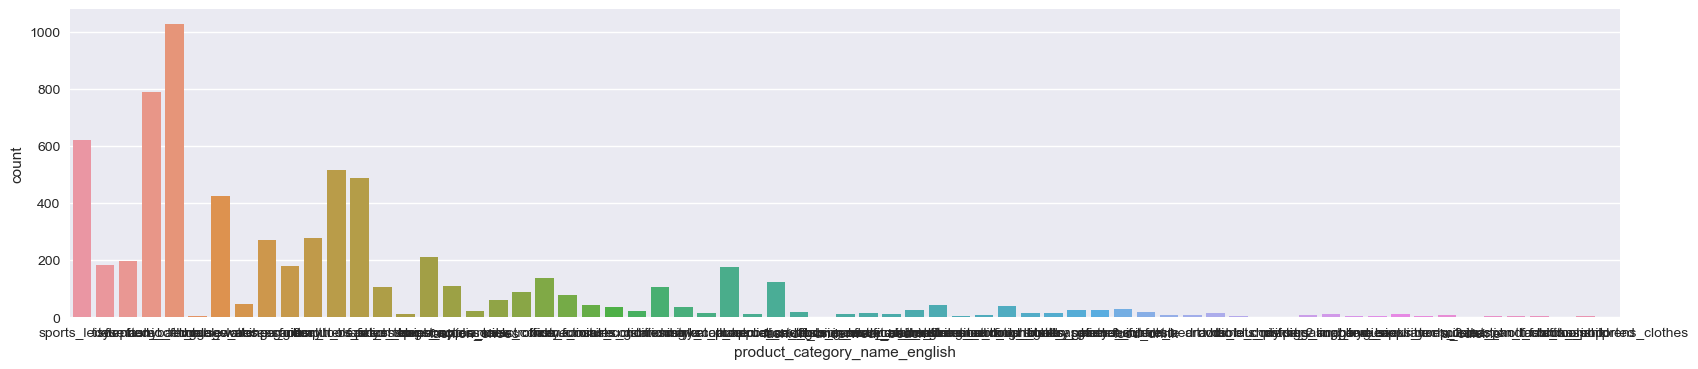

In [136]:
plt.figure(figsize=(20,4))
sns.countplot(data=df_2,x='product_category_name_english')